# Example of loading txt from s3 and processing using re

### Before running the code

You will need to `uniflow` conda environment to run this notebook. You can set up the environment following the instruction: https://github.com/CambioML/uniflow/tree/main#installation. Furthermore, make sure you have the following packages installed:

In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import pprint

sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

In [2]:
import os

from uniflow.flow.client import ExtractClient
from uniflow.flow.config import ExtractS3TxtConfig
from uniflow.viz import Viz
from uniflow.flow.flow_factory import FlowFactory

FlowFactory.list()

/Users/lingjiekong/anaconda3/envs/uniflow/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'extract': ['ExtractImageFlow',
  'ExtractIpynbFlow',
  'ExtractMarkdownFlow',
  'ExtractPDFFlow',
  'ExtractTxtFlow',
  'ExtractS3TxtFlow'],
 'transform': ['TransformAzureOpenAIFlow',
  'TransformCopyFlow',
  'TransformHuggingFaceFlow',
  'TransformLMQGFlow',
  'TransformOpenAIFlow'],
 'rater': ['RaterFlow']}

### Setup AWS CLI AWS_ACCESS_KEY_ID, AWS_SECRET_ACCESS_KEY, AWS_REGION
For example, if AWS_ACCESS_KEY_ID is a, AWS_SECRET_ACCESS_KEY is b, and AWS_REGION is c, the environment should bel like below.
```
%env AWS_ACCESS_KEY_ID=a
%env AWS_SECRET_ACCESS_KEY=b
%env AWS_REGION=c
```
note: do not use ' or " for the assigned value!

In [3]:
# %env AWS_ACCESS_KEY_ID='your_access_key'
# %env AWS_SECRET_ACCESS_KEY='your_secret_key'
# %env AWS_REGION='your_region'

print(f"aws access key id is {os.environ.get('AWS_ACCESS_KEY_ID')})")
print(f"aws secret access key is {os.environ.get('AWS_SECRET_ACCESS_KEY')}")
print(f"aws region is {os.environ.get('AWS_REGION')}")


aws access key id is None)
aws secret access key is None
aws region is None


### Prepare input data regarding s3 bucket and key

In [45]:
data = [{"bucket": "uniflow-test",
         "key": "test.txt"}]

In [46]:
client = ExtractClient(ExtractS3TxtConfig())

In [47]:
output = client.run(data)
pprint.pprint(output)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

[{'output': [{'text': ["One of the most important things I didn't understand "
                       'about the world when I was a child is the degree to '
                       'which the returns for performance are superlinear.',
                       'Teachers and coaches implicitly told us the returns '
                       'were linear. "You get out," I heard a thousand times, '
                       '"what you put in." They meant well, but this is rarely '
                       'true. If your product is only half as good as your '
                       "competitor's, you don't get half as many customers. "
                       'You get no customers, and you go out of business.',
                       "It's obviously true that the returns for performance "
                       'are superlinear in business. Some think this is a flaw '
                       'of capitalism, and that if we changed the rules it '
                       'would stop being true. But superlin

In [48]:
output[0]['output'][0]['text']

["One of the most important things I didn't understand about the world when I was a child is the degree to which the returns for performance are superlinear.",
 'Teachers and coaches implicitly told us the returns were linear. "You get out," I heard a thousand times, "what you put in." They meant well, but this is rarely true. If your product is only half as good as your competitor\'s, you don\'t get half as many customers. You get no customers, and you go out of business.',
 "It's obviously true that the returns for performance are superlinear in business. Some think this is a flaw of capitalism, and that if we changed the rules it would stop being true. But superlinear returns for performance are a feature of the world, not an artifact of rules we've invented. We see the same pattern in fame, power, military victories, knowledge, and even benefit to humanity. In all of these, the rich get richer.",
 "You can't understand the world without understanding the concept of superlinear retu

In [49]:
graph = Viz.to_digraph(output[0]["root"])

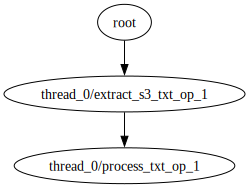

In [50]:
display(graph)